In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Aplicando Estilo Matplotlib
plt.style.use('seaborn')

# Importando Dataset
d = pd.read_csv('dados.csv')
d.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [2]:
# Distribuição de Freq. Qualitativa Sexo
# Dicionário de Genero
genero = {
    0: 'Masculino',
    1: 'Feminino'
}

#Series com frequencias (Absoluta e Relativa)
freq_abs = d['Sexo'].value_counts()
freq_rel = d['Sexo'].value_counts(normalize=True) * 100

# DataFrame com as frequencias
df_sexo = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de indices
df_sexo.rename(index=genero, inplace=True)

# Renomeacao de coluna de indices
df_sexo.rename_axis('Sexo', axis='columns', inplace=True)
df_sexo.head()

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


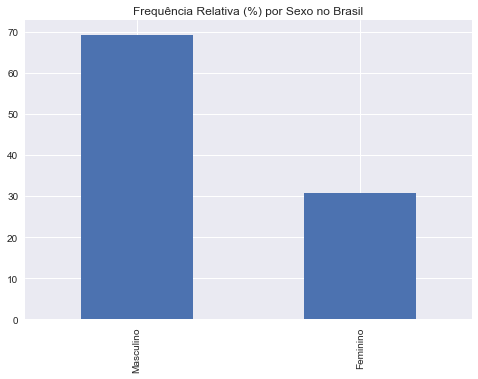

In [3]:
# Plotagem: Frequencia relativa (Sexo)
df_sexo.iloc[:,-1].plot(
    kind='bar', 
    title='Frequência Relativa (%) por Sexo no Brasil'
);

In [4]:
# Distribuição de Freq. Qualitativa Raça
# Dicionário de Raça
raca = {
    0: 'Indigena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem Declaração'
}

#Series com frequencias (Absoluta e Relativa)
freq_abs = d['Cor'].value_counts()
freq_rel = d['Cor'].value_counts(normalize=True) * 100

# DataFrame com as frequencias
df_raca = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de indices
df_raca.rename(index=raca, inplace=True)

# Renomeacao de coluna de indices
df_raca.rename_axis('Raça', axis='columns', inplace=True)
df_raca

Raça,Frequência,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indigena,357,0.464602
Amarela,352,0.458095


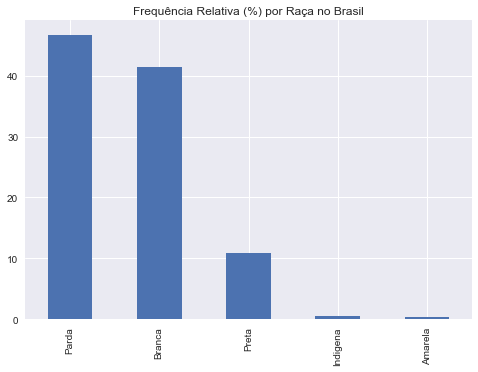

In [5]:
# Plotagem: Frequencia relativa (Raça)
df_raca.iloc[:,-1].plot(
    kind='bar', 
    title='Frequência Relativa (%) por Raça no Brasil'
);